In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

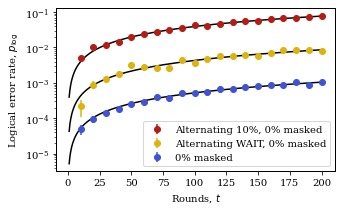

In [80]:
plt.rc('font', family='serif')
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1
fig, ax = plt.subplots(1, 1, figsize=(5,3), sharey=True)

codes = [
    # "5_4_360/iterative_masked_decoding.res",
    "5_4_360/10alternating0.res",
    "5_4_360/skipalternating0.res",
    "5_4_360/iterative_masked_decoding.res",
    # "5_4_360/iterative_masked_decoding.res",
][::-1]
p_masks = [0.1, 0.1, 0.0][::-1]
# axes = [1,1,0,0,0]
labels = ["Alternating 10%, 0% masked","Alternating WAIT, 0% masked","0% masked"][::-1]

def fun(x, a):
    return 1 - (1 - a)**x
params = []

cutoff = 0
upper_cutoff = 201
colors = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93)]
colors = [(c[0]/255, c[1]/255, c[2]/255) for c in colors]

for i, code in enumerate(codes):
    df = pd.read_csv(f"./{code}")
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
    # df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)

    df = df[(df['t'] % 10 == 0) & (df['t'] <= upper_cutoff)]
    tmp_df = df[(df['p_mask'] == p_masks[i]) & (df['t'] >= cutoff) & (df['p_std_dev'] > 0)]
    
    tmp_df_fit = df[(df['p_mask'] == p_masks[i]) & (df['t'] >= cutoff)]
    tmp_df_before = df[(df['p_mask'] == p_masks[i]) & (df['t'] < cutoff)]

    ax.errorbar(tmp_df_fit['t'], tmp_df_fit['p_error'], tmp_df_fit['p_std_dev'], label=f'{labels[i]}', fmt='o', c=colors[i])
    ax.errorbar(tmp_df_before['t'], tmp_df_before['p_error'], tmp_df_before['p_std_dev'], fmt='x', alpha=0.8, c=colors[i])

    popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),sigma=tmp_df['p_std_dev'])
    # print(j, popt, np.sqrt(np.diag(pcov)), r2_score(tmp_df['p_error'], fun(tmp_df['t'], *popt)))
    params.append(popt[0])
    xx = np.linspace(1, upper_cutoff, 1000)
    yy = fun(xx, *popt)
    ax.plot(xx[0:], yy[0:], c='k')
    # ax.plot(xx[:100], yy[:100], c='k', linestyle='--', alpha=0.8)

ax.set_ylabel('Logical error rate, $p_\log$')
ax.set_xlabel('Rounds, $t$')
plt.yscale('log')

handles,labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, loc='lower right')

plt.savefig('../../../figures/hyperbolic', dpi=1000, transparent=False, bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Rounds, $t$')

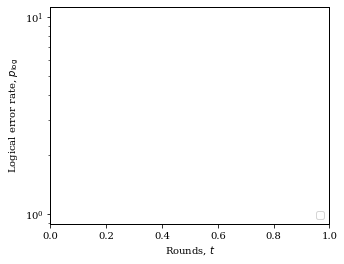

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), sharey=True)

codes = [
    # "5_4_60",
    # "5_4_160/iterative_masked_decoding.res",
    # "5_4_160/iterative_masked_decoding2.res",
    # "../simple_scheduling/5_4_160/iterative_masked_decoding.res"
    "5_4_360/iterative_masked_decoding.res",
    # "5_4_1800"
]
labels = [
    "0%"
    # "Nothing, 0% mask, alternating",
    # "10% mask, 0% mask, alternating",
    # "10% mask every time"
]
p_masks = [0.1]


def fun(x, a):
    return 1 - (1 - a)**x
params = []

for i, code in enumerate(codes):
    # df = pd.read_csv(f"./{code}/iterative_masked_decoding2.res")
    df = pd.read_csv(f"./{code}")
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['no_test'])
    # df['p_std_dev'].replace(to_replace=0, value=1e-2, inplace=True)

    def fun(x, a):
        return 1 - (1 - a)**x

    cutoff = 0
    upper_cutoff = 201
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for k, j in enumerate(p_masks):
        df = df[(df['t'] % 10 == 0) & (df['t'] <= upper_cutoff)]
        tmp_df = df[(df['p_mask'] == j) & (df['t'] >= cutoff) & (df['p_std_dev'] > 0)]
        if (len(tmp_df)):            
            tmp_df_fit = df[(df['p_mask'] == j) & (df['t'] >= cutoff)]
            tmp_df_before = df[(df['p_mask'] == j) & (df['t'] < cutoff)]

            ax.errorbar(tmp_df_fit['t'], tmp_df_fit['p_error'], tmp_df_fit['p_std_dev'], fmt='o', c=colors[i])
            ax.errorbar(tmp_df_before['t'], tmp_df_before['p_error'], tmp_df_before['p_std_dev'], fmt='x', alpha=0.8)

            popt, pcov = curve_fit(fun, tmp_df['t'], tmp_df['p_error'], maxfev=1000, p0=(0.001),sigma=tmp_df['p_std_dev'])
            print(j, popt, np.sqrt(np.diag(pcov)), r2_score(tmp_df['p_error'], fun(tmp_df['t'], *popt)))
            params.append(popt[0])
            xx = np.linspace(1, upper_cutoff, 1000)
            yy = fun(xx, *popt)
            ax.plot(xx, yy, c='k')

plt.yscale('log')
plt.legend(loc='lower right')
plt.ylabel("Logical error rate, $p_\log$")
plt.xlabel("Rounds, $t$")